## 2021년 11월 3일 스터디
**Dacon 교육 - [공공] 서울시 따릉이 자전거 이용 예측 AI모델 - [제주TP] 따릉이 모델 평가프로그램**

2021/11/03 목주영

- 커널 링크 : https://dacon.io/competitions/open/235576/codeshare/1545?page=1&dtype=recent
    - https://dacon.io/competitions/open/235576/data 링크로 들어가 따릉이 데이터 다운받기
- 학습 방법 : 동영상 보고 따라 해보기 1번 + 2번 혼자 써보기
- 리뷰 사항 : 코드 전반적인 발표 준비 + 인사이트와 아쉬운 사항 제기 및 보완

**머신러닝 스터디**
- 목표 : 머신러닝 관련 실습을 통해, 국내 공모전 참여 및 수상
- 스터디 방법 : 캐글, 데이콘 튜토리얼 코드 리뷰 ~ 공모전 참여
- 소요 시간 : 1시간 30분~2시간(줌 온라인)

<span style="color:blue">**인사이트, 아쉬운 사항 제기 및 보완**</span>

<ol>
    <li>K-fold Cross Validation가 무엇인지와 교차검증을 어떻게 사용하는 지에 대해서 알게되었다.</li>
    <li>시각화/ 통계 그래프화 (seaborn), 그래프 해석이 잘 되어있다.</li>
    <li>설명이 잘 나와있지 않다...(저번주 코드보다 불친절하다) -> 각각의 코드에 대한 설명 달기</li>
    <li> K Fold 교차 검증의 맨 마지막 코드가 비어있음 -> 채워보기!</li>
    <li>다른 성능 측정 방법들은??? (다른 성능 측정 지표들은?) -> RMSE (Root Mean Square Error, l2 norm), MAE (Mean Absolute Error, l1 norm), MSE, cost function</li>
    <li>precision/recall -> classification 의 성능 측정 지표</li>
    <li>모델/파라미터를 적절하게 선택했는지 확인하는 방법들 -> Grid Search, Randomized Search, Ensemble Method</li>
</ol>

## 따릉이 데이터를 활용한 데이터 분석

- 각 날짜의 1시간 전의 기상상황을 가지고 1시간 후의 따릉이 대여수를 예측해보세요. 

## 1. 라이브러리 및 데이터
## Library & Data

In [1]:
import pandas as pd #판다스 패키지 불러오기
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor #랜덤 포레스트 불러오기

In [2]:
# 데이터 불러오기
train = pd.read_csv('train.csv')# 모델 학습 파일
test = pd.read_csv('test.csv')# 모델 파일
submission = pd.read_csv('submission.csv')#답안지 파일 

In [3]:
train.isna().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [4]:
# 'hour', 'hour_bef_temperature', 'hour_bef_precipitation', 'hour_bef_windspeed', 'hour_bef_humidity' => 5개의 특성값을 사용
columns = ['hour', 'hour_bef_temperature', 'hour_bef_precipitation', 'hour_bef_windspeed', 'hour_bef_humidity']
X_train = train[columns]
y_train = train['count']
X_test = test[columns]

In [5]:
X_train.shape, y_train.shape, X_test.shape

((1459, 5), (1459,), (715, 5))

In [6]:
# X_train의 결측치 여부 확인
X_train.isna().sum()

hour                      0
hour_bef_temperature      2
hour_bef_precipitation    2
hour_bef_windspeed        9
hour_bef_humidity         2
dtype: int64

In [7]:
# X_train의 특성에 있는 결측치를 각 특성의 mean값으로 한 번에 채우기
X_train['hour_bef_temperature'] = X_train['hour_bef_temperature'].fillna(value = X_train['hour_bef_temperature'].mean())
X_train['hour_bef_precipitation'] = X_train['hour_bef_precipitation'].fillna(value = X_train['hour_bef_temperature'].mean())
X_train['hour_bef_windspeed'] = X_train['hour_bef_windspeed'].fillna(value = X_train['hour_bef_temperature'].mean())
X_train['hour_bef_humidity'] = X_train['hour_bef_humidity'].fillna(value = X_train['hour_bef_temperature'].mean())

<ipython-input-7-18a15400b5c7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['hour_bef_temperature'] = X_train['hour_bef_temperature'].fillna(value = X_train['hour_bef_temperature'].mean())
<ipython-input-7-18a15400b5c7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['hour_bef_precipitation'] = X_train['hour_bef_precipitation'].fillna(value = X_train['hour_bef_temperature'].mean())
<ipython-input-7-18a15400b5c7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [8]:
# X_test의 결측치 여부 확인
X_test.isna().sum()

hour                      0
hour_bef_temperature      1
hour_bef_precipitation    1
hour_bef_windspeed        1
hour_bef_humidity         1
dtype: int64

In [9]:
# X_test의 특성에 있는 결측치를 각 특성의 mean값으로 한 번에 채우기
X_test['hour_bef_temperature'] = X_test['hour_bef_temperature'].fillna(value = X_test['hour_bef_temperature'].mean())
X_test['hour_bef_precipitation'] = X_test['hour_bef_precipitation'].fillna(value = X_test['hour_bef_temperature'].mean())
X_test['hour_bef_windspeed'] = X_test['hour_bef_windspeed'].fillna(value = X_test['hour_bef_temperature'].mean())
X_test['hour_bef_humidity'] = X_test['hour_bef_humidity'].fillna(value = X_test['hour_bef_temperature'].mean())

<ipython-input-9-e8a3e1ca41c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['hour_bef_temperature'] = X_test['hour_bef_temperature'].fillna(value = X_test['hour_bef_temperature'].mean())
<ipython-input-9-e8a3e1ca41c3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['hour_bef_precipitation'] = X_test['hour_bef_precipitation'].fillna(value = X_test['hour_bef_temperature'].mean())
<ipython-input-9-e8a3e1ca41c3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [10]:
X_train.isna().sum()

hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
dtype: int64

In [11]:
X_test.isna().sum()

hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
dtype: int64

## 모델 불러오기

#### RondomForest
: 부트스트랩 샘플로 만든 다수의 결정 트리들로 분류 결과를 취합해서 예측하는 앙상블 모델

https://blog.naver.com/harini1029/222473872962

#### LightGBM (Light Gradient Boosting Machine)
: a free and open source distributed gradient boosting framework for machine learning originally developed by Microsoft. It is based on decision tree algorithms and used for ranking, classification and other machine learning tasks.

https://en.wikipedia.org/wiki/LightGBM

#### XGBoost (eXtreme Gradient Boosting)
: fast execution speed & great model performance

https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/

#### KNeighborsRegressor
: K-최근접이웃회귀, Regression based on k-nearest neighbors, 샘플과 가장 가까운 이웃들의 평균값을 근거로 특정 값을 예측하는 알고리즘

https://blog.naver.com/psycomaniac/222404193295

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

- anaconda prompt에서 lightgbm 모델을 설치
- pip install lightgbm

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor

## 딕셔너리 자료구조에 (모델) 저장하기
• A dictionary is a general-purpose data structure for storing a group of objects.

• A dictionary has a set of keys and each key has a single associated value.

• When presented with a key the dictionary will return the associated value.

In [13]:
model_dict = {'DT':DecisionTreeRegressor(),
             'RF':RandomForestRegressor(),
             'LGB':lgb.LGBMRegressor(),
             'XGB':xgb.XGBRegressor(),
             'KNN':KNeighborsRegressor()}

In [14]:
model_dict['DT']

DecisionTreeRegressor()

In [15]:
model_dict['XGB']

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)

## for문을 활용해서 모델 평가 프로그램 (k-fold cv)을 생성

### K-fold cross validation

#### : resampling procedure used to evaluate machine learning models on a limited data sample. 데이터의 개수가 충분하지 않은 경우 사용

#### 데이터가 편향되어있는 경우 (답이 거의 치우쳐서 있는 경우) 성능이 정확히 나오지 않을 때 사용하면 좋음

#### : The general procedure is as follows:

1. Shuffle the dataset randomly.

2. Split the training set into k-folds

3. For each unique group:
 - Take the group as a hold out or test data set
 - Take the remaining groups as a training data set
 - Fit a model on the training set and evaluate it on the test set
 - Retain the evaluation score and discard the model

4. Summarize the skill of the model using the sample of model evaluation scores


https://machinelearningmastery.com/k-fold-cross-validation/

In [16]:
from sklearn.model_selection import KFold

In [17]:
import numpy as np

In [18]:
# 5개의 fold
k_fold = KFold(n_splits=5, shuffle= True, random_state=10)

In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
score = {}

for model_name in model_dict.keys():
    
    model = model_dict[model_name]
    
    score[model_name] = np.mean(cross_val_score(model, X_train, y_train, scoring = 'neg_mean_squared_error', n_jobs = -1, cv = k_fold))
    print(f'{model_name} 평가 완료')
    print(score[model_name])
    
    print()
    
print(score)

DT 평가 완료
-3001.813303205762

RF 평가 완료
-1795.8961591472485

LGB 평가 완료
-1761.6862003080428

XGB 평가 완료
-1970.9608798264485

KNN 평가 완료
-2282.539825730829

{'DT': -3001.813303205762, 'RF': -1795.8961591472485, 'LGB': -1761.6862003080428, 'XGB': -1970.9608798264485, 'KNN': -2282.539825730829}


<AxesSubplot:>

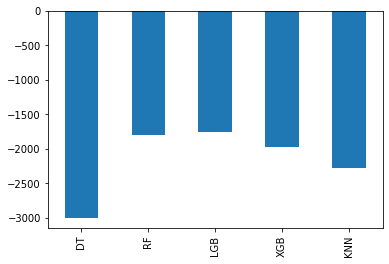

In [21]:
pd.Series(score).plot(kind = 'bar')

## 2. 탐색적 자료분석
## Exploratory Data Analysis (EDA)


### pd.DataFrame.head()
 - 데이터 프레임의 위에서 부터 n개 행을 보여주는 함수
 - n의 기본 값(default 값)은 5

In [22]:
X_train.head()

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity
0,20,16.3,1.0,1.5,89.0
1,13,20.1,0.0,1.4,48.0
2,6,13.9,0.0,0.7,79.0
3,23,8.1,0.0,2.7,54.0
4,18,29.5,0.0,4.8,7.0


+ id : 날짜와 시간별 id
+ hour_bef_temperature : 1시간 전 기온
+ hour_bef_precipitation : 1시간 전 비 정보, 비가 오지 않았으면 0, 비가 오면 1
+ hour_bef_windspeed : 1시간 전 풍속(평균)
+ hour_bef_humidity : 1시간 전 습도
+ hour_bef_visibility : 1시간 전 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
+ hour_bef_ozone : 1시간 전 오존
+ hour_bef_pm10 : 1시간 전 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
+ hour_bef_pm2.5 : 1시간 전 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
+ count : 시간에 따른 따릉이 대여 수 

In [23]:
y_train.head()

0     49.0
1    159.0
2     26.0
3     57.0
4    431.0
Name: count, dtype: float64

### pd.DataFrame.tail()
 - 데이터 프레임의 아래에서 부터 n개 행을 보여주는 함수
 - n의 기본 값(default 값)은 5

In [24]:
X_train.tail()

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity
1454,4,16.8,0.0,1.6,53.0
1455,3,10.8,0.0,3.8,45.0
1456,5,18.3,0.0,1.9,54.0
1457,21,20.7,0.0,3.7,37.0
1458,17,21.1,0.0,3.1,47.0


### pd.DataFrame.shape
 - 데이터 프레임의 행의 개수와 열의 개수가 저장되어 있는 속성(attribute)

In [25]:
X_train.shape

(1459, 5)

### pd.DataFrame.info()
- 데이터셋의 column별 정보를 알려주는 함수
- 비어 있지 않은 값은 (non-null)은 몇개인지?
- column의 type은 무엇인지?
 - type의 종류 : int(정수), float(실수), object(문자열), 등등 (date, ...)

In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   hour                    1459 non-null   int64  
 1   hour_bef_temperature    1459 non-null   float64
 2   hour_bef_precipitation  1459 non-null   float64
 3   hour_bef_windspeed      1459 non-null   float64
 4   hour_bef_humidity       1459 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 57.1 KB


### pd.DataFrame.describe()
- 숫자형 (int, float) column들의 기술 통계량을 보여주는 함수

- 기술통계량이란?
 - 해당 column을 대표할 수 있는 통계값들을 의미
 
 
- 기술통계량 종류
 - count: 해당 column에서 비어 있지 않은 값의 개수
 - mean: 평균
 - std: 표준편차
 - min: 최솟값 (이상치 포함)
 - 25% (Q1): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 1/4번째 지점에 있는 값
 - 50% (Q2): 중앙값 (전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 2/4번째 지점에 있는 값)
 - 75% (Q3): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 3/4번째 지점에 있는 값
 - max: 최댓값 (이상치 포함) 
 
 
 
- 이상치: 울타리 밖에 있는 부분을 이상치라고 정의함
   - 아래쪽 울타리: $Q_1$ - $1.5 * IQR$
   - 위쪽 울타리: $Q_3$ + $1.5 * IQR$
   - $IQR$ = $Q_3 - Q_1$
 
 
<img src="https://miro.medium.com/max/10125/1*NRlqiZGQdsIyAu0KzP7LaQ.png" width="700" height="500">

In [27]:
X_train.describe()

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,11.493489,16.717433,0.054445,2.566866,52.182615
std,6.922790,5.235555,0.641832,1.769633,20.398803
min,0.000000,3.100000,0.000000,0.000000,7.000000
25%,5.500000,12.800000,0.000000,1.400000,36.000000
50%,11.000000,16.600000,0.000000,2.400000,51.000000
75%,17.500000,20.050000,0.000000,3.400000,68.500000
max,23.000000,30.000000,16.717433,16.717433,99.000000


### pd.DataFrame.groupby()
 - 집단에 대한 통계량 확인 
 
<img src="https://s3.amazonaws.com/files.dezyre.com/images/Tutorials/Split+Apply+Combine+Strategy.png" width="700" height="500">

### plt.plot()의 스타일

색깔

|문자열|약자|
|----|-----|
|blue|b|
|green|g|
|red|r|
|cyan|c|
|magenta|m|
|yellow|y|
|black|k|
|white|w|

마커

|마커|의미|
|----|----|
|.|점|
|o|원|
|v|역삼각형|
|^|삼각형|
|s|사각형|
|*|별|
|x|엑스|
|d|다이아몬드|

선

|문자열|의미|
|-----|-----|
| - | 실선|
|-- | 끊어진 실선|
| -.| 점+실선|
|:|점선|

In [28]:
import matplotlib.pyplot as plt

In [29]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


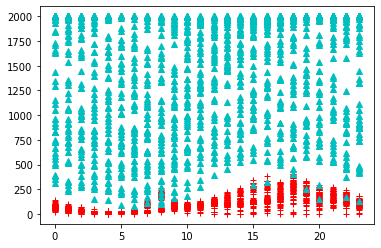

In [30]:
# 데이터가 골고루 분포되어있음을 볼 수 있음
plt.plot('hour', 'count', 'r+', data = train)
plt.plot('hour', 'hour_bef_visibility', 'c^', data = train)

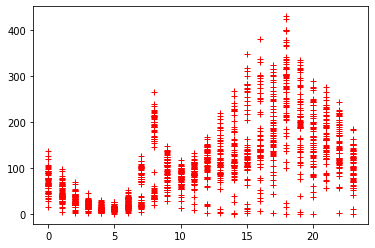

In [31]:
plt.plot('hour', 'count', 'r+', data = train)

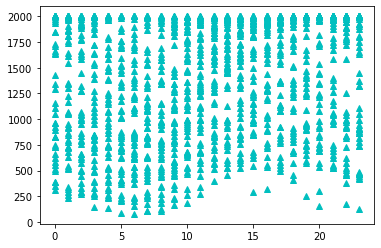

In [32]:
plt.plot('hour', 'hour_bef_visibility', 'c^', data = train)

### plt.title(label, fontsize)
- 그래프 제목 생성

### plt.xlabel(label, fontsize)
- x축 이름 설정

### plt.ylabel(label, fontsize)
- y축 이름 설정

### plt.axvline(x, color)
- 축을 가로지르는 세로 선 생성

### plt.text(x, y, s, fontsize)
- 원하는 위치에 텍스트 생성

### 상관계수

- 상관계수: 두 개의 변수가 같이 일어나는 강도를 나타내는 수치 
- -1에서 1사이의 값을 지닙니다. 
- -1이나 1인 수치는 현실 세계에서 관측되기 힘든 수치입니다. 
- 분야별로 기준을 정하는 것에 따라 달라지겠지만, 보통 0.4이상이면 두 개의 변수간에 상관성이 있다고 얘기합니다. 

![상관계수](https://t1.daumcdn.net/cfile/tistory/99DEE1425C6A9F2008)

- 상관관계는 인과관계와 다릅니다. 아래의 예시를 확인해 봅시다.

![상관성 예시](https://miro.medium.com/max/684/1*JLYI5eCVEN7ZUWXBIrrapw.png)

- 선글라스 판매량이 증가함에 따라, 아이스크림 판매액도 같이 증가하는 것을 볼 수 있습니다. 
- 하지만 선글라스 판매량이 증가했기 **때문에** 아이스크림 판매액이 증가했다라고 해석하는 것은 타당하지 않습니다. 
- 선글라스 판매량이 증가했다는 것은 여름 때문이라고 볼 수 있으므로, 날씨가 더워짐에 따라 선글라스 판매량과 아이스크림 판매액이 같이 증가했다고 보는 것이 타당할 것입니다. 

### pd.DataFrame.corr()

- correlation coefficient 의 줄임말 입니다 

#### Seaborn
- Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures.
- 통계 그래픽을 만드는 라이브러리

- Seaborn helps you explore and understand your data. Its plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic mapping and statistical aggregation to produce informative plots. Its dataset-oriented, declarative API lets you focus on what the different elements of your plots mean, rather than on the details of how to draw them.

### sns.lmplot()

- Plot data and regression model fits across a FacetGrid. FacetGrid에 걸쳐 데이터 및 회귀 모형 적합도를 표시
- This function combines regplot() and FacetGrid. It is intended as a convenient interface to fit regression models across conditional subsets of a dataset. 이 함수는 Regplot()과 FacetGrid를 결합합니다. 데이터 집합의 조건부 하위 집합에 걸쳐 회귀 모델을 적합시키기 위한 편리한 인터페이스입니다.

#### sns.FacetGrid()
- Multi-plot grid for plotting conditional relationships. 조건부 관계를 표시하기 위한 다중구 그리드

#### sns.regplot()
- Multi-plot grid for plotting conditional relationships. 산점도; 데이터 및 선형 회귀 모형 적합도를 표시합니다.

In [33]:
import seaborn as sns

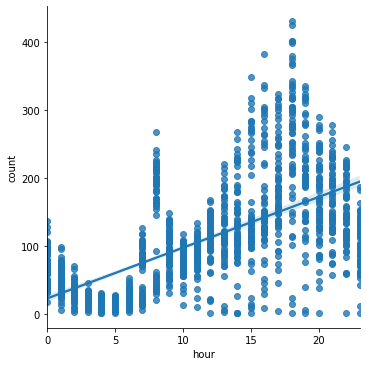

In [34]:
sns.lmplot(x = 'hour', y = 'count', data = train)

### sns.kdeplot()

- Plot univariate or bivariate distributions using kernel density estimation. 커널 밀도 추정을 사용하여 일변량 또는 이변량 분포를 표시합니다.

- A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions. 커널 밀도 추정치(KDE) plot은 히스토그램과 유사한 데이터 집합의 관측치 분포를 시각화하는 방법입니다. KDE는 하나 이상의 차원의 연속 확률 밀도 곡선을 사용하여 데이터를 나타냅니다.

<AxesSubplot:xlabel='count', ylabel='Density'>

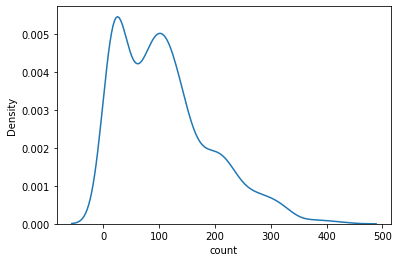

In [35]:
sns.kdeplot(train['count']) # 확률밀도함수

### sns.boxplot()

- Draw a box plot to show distributions with respect to categories. 범주와 관련된 분포를 표시

- A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range. 상자 그림(또는 상자-수염 그림)은 변수 간 또는 범주형 변수의 여러 수준을 쉽게 비교할 수 있는 방식으로 양적 데이터의 분포를 표시합니다. 상자에는 사분위수 범위의 함수인 방법을 사용하여 "이상"으로 결정된 점을 제외한 나머지 분포가 표시되도록 수염이 확장되는 동안 데이터 세트의 사분위가 표시됩니다.

<AxesSubplot:xlabel='hour', ylabel='hour_bef_humidity'>

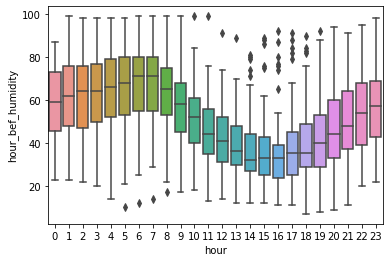

In [36]:
sns.boxplot(x = 'hour', y = 'hour_bef_humidity', data = train)

### sns.pairplot()

- Plot pairwise relationships in a dataset. 데이터 집합에 쌍 관계를 표시합니다.

- By default, this function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column. 기본적으로 이 함수는 데이터의 각 숫자 변수를 단일 행의 y축과 단일 열에 걸친 x축에서 공유하도록 축의 그리드를 만듭니다. 대각선 그림은 다르게 처리됩니다. 일변량 분포도를 그려 각 열에 있는 데이터의 주변 분포를 표시합니다.

- It is also possible to show a subset of variables or plot different variables on the rows and columns. 변수의 부분 집합을 표시하거나 행과 열에 다른 변수를 표시할 수도 있습니다.


- This is a high-level interface for PairGrid that is intended to make it easy to draw a few common styles. You should use PairGrid directly if you need more flexibility. 이 인터페이스는 몇 가지 일반적인 스타일을 쉽게 그릴 수 있도록 설계된 PairGrid의 고급 인터페이스입니다. 유연성이 더 필요한 경우 PairGrid를 직접 사용해야 합니다.

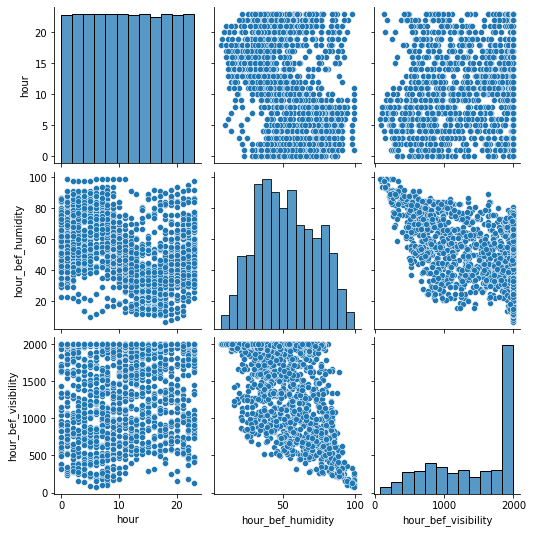

In [37]:
sns.pairplot(train[['hour', 'hour_bef_humidity', 'hour_bef_visibility']])

### sns.jointplot()

- Draw a plot of two variables with bivariate and univariate graphs. 이변량 및 일변량 그래프를 사용하여 두 변수의 plot을 그립니다.

- This function provides a convenient interface to the JointGrid class, with several canned plot kinds. This is intended to be a fairly lightweight wrapper; if you need more flexibility, you should use JointGrid directly. 이 기능은 여러 캔 플롯 종류와 함께 JointGrid 클래스에 편리한 인터페이스를 제공합니다. 이 패키지는 상당히 가벼운 wrapper로 제작되었습니다. 유연성이 더 필요한 경우 JointGrid를 직접 사용해야 합니다.

C:\Users\MOK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


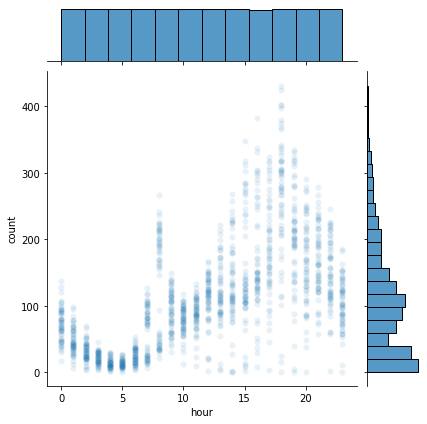

In [38]:
sns.jointplot('hour', 'count', data = train, alpha = 0.1) # 분포도 파악할 수 있음

### sns.violinplot()

- Draw a combination of boxplot and kernel density estimate. 상자 그림과 커널 밀도 추정치의 조합을 그립니다.

- A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution. 바이올린 플롯은 박스 플롯과 수염 플롯과 비슷한 역할을 한다. 하나 이상의 범주형 변수의 여러 수준에 걸친 양적 데이터의 분포를 보여줌으로써 이러한 분포를 비교할 수 있습니다. 모든 플롯 성분이 실제 데이터포인트에 해당하는 박스 플롯과 달리, 바이올린 플롯은 기본 분포의 커널 밀도 추정을 특징으로 합니다.

- This can be an effective and attractive way to show multiple distributions of data at once, but keep in mind that the estimation procedure is influenced by the sample size, and violins for relatively small samples might look misleadingly smooth. 이는 데이터의 여러 분포를 한 번에 보여주는 효과적이고 매력적인 방법이 될 수 있지만 추정 절차는 표본 크기에 영향을 받으며 상대적으로 작은 표본에 대한 바이올린은 오해의 소지가 있는 것처럼 보일 수 있다는 점을 명심해야 한다.

<AxesSubplot:xlabel='hour', ylabel='hour_bef_humidity'>

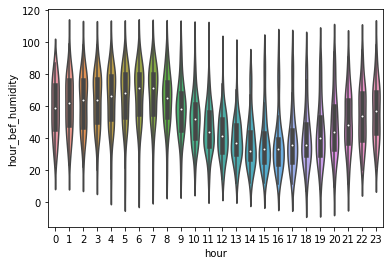

In [39]:
sns.violinplot(x = 'hour', y = 'hour_bef_humidity', data = train)

### sns.relplot()

- Figure-level interface for drawing relational plots onto a FacetGrid. FacetGrid에 관계형 그림을 그리기 위한 그림 수준 인터페이스입니다.

- This function provides access to several different axes-level functions that show the relationship between two variables with semantic mappings of subsets. The kind parameter selects the underlying axes-level function to use: 이 함수는 하위 집합의 의미론적 매핑으로 두 변수 사이의 관계를 보여주는 여러 다른 축 수준 함수에 대한 액세스를 제공한다. 종류 파라미터는 사용할 기본 축 수준 함수를 선택합니다.

    scatterplot() (with kind="scatter"; the default)

    lineplot() (with kind="line")

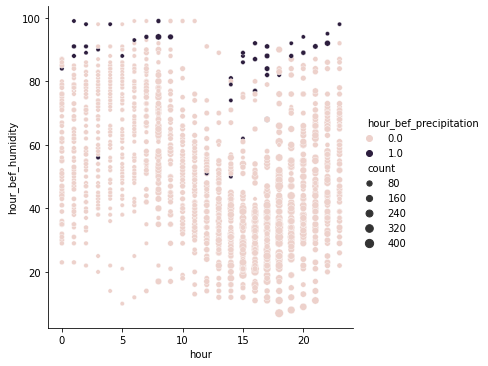

In [40]:
sns.relplot(x = 'hour', y = 'hour_bef_humidity', hue = 'hour_bef_precipitation', size = 'count', data = train)

## 3. 데이터 전처리
## Data Cleansing & Pre-Processing  

### pd.Series.isna()
- 결측치 여부를 확인해줍니다.
- 결측치면 True, 아니면 False

In [41]:
X_train.isna()

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1454,False,False,False,False,False
1455,False,False,False,False,False
1456,False,False,False,False,False
1457,False,False,False,False,False


### pd.DataFrame.fillna()
- 결측치를 채우고자 하는 column과 결측치를 대신하여 넣고자 하는 값을 명시해주어야 합니다.

In [42]:
#이전에 1번에서 해줌

## 4. 변수 선택 및 모델 구축
## Feature Engineering & Initial Modeling  

### sklearn.neighbors.KNeighborsRegressor()
- KNN 모형

![](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final1_ibdm8a.png)

In [43]:
from sklearn.neighbors import KNeighborsRegressor
model1 = KNeighborsRegressor(n_jobs = -1) #모든 코어를 사용

### sklearn.ensemble.RandomForestRegressor()
- 랜덤 포레스트 모형

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/rfc_vs_dt1.png)

In [44]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor()

## 5. 모델 학습 및 검증
## Model Tuning & Evaluation

### model.fit()
- 모델 학습

In [45]:
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

RandomForestRegressor()

In [46]:
print(model1.score(X_train, y_train))
print(model2.score(X_train, y_train))

0.7981850519862341
0.9674088757043716


### model.predict()
- 모델 예측

In [47]:
ypred1 = model1.predict(X_test)
ypred2 = model2.predict(X_test)

### pd.DataFrame.to_csv()
 - csv파일 저장하는 함수

In [48]:
submission['count'] = ypred1
submission.to_csv('model1.csv', index = False) # KNeighborsRegressor
submission['count'] = ypred2
submission.to_csv('model2.csv', index = False) # RandomForestRegressor

## 교차검증 소개: Cross Validation(CV)

### 홀드아웃 교차검증기법(Hold-out Cross Validation)

![](https://www.datavedas.com/wp-content/uploads/2018/04/image003.jpg)

In [49]:
from sklearn.model_selection import train_test_split

> `train_test_split(특징데이터, 타겟데이터, test_size= 0.25, shuffle= True, random_state= 1)`
- 특징데이터와 타겟데이터를 순서대로 넣어줍니다
- test_size: 분할할 검증용데이터 사이즈를 설정합니다(0~1)
- shuffle: 데이터를 섞습니다 <span style='color:red'> <- 순서가 중요한 데이터가 아니라면 언제나 True!</span>
- random_state: 재구현을 위해 시드값을 넣어줍니다

In [50]:
X_trn, X_val, y_trn, y_val = train_test_split(X_train, y_train, test_size = 0.25, shuffle = True, random_state = 10)

In [51]:
X_trn.shape, X_val.shape, y_trn.shape, y_val.shape

((1094, 5), (365, 5), (1094,), (365,))

In [52]:
rf_reg = RandomForestRegressor(n_estimators = 200, max_depth = 8)
rf_reg.fit(X_trn, y_trn)
print(rf_reg.score(X_trn, y_trn))
print(rf_reg.score(X_val, y_val))

0.9031054104575658
0.7110820158298696


### K폴드 교차검증기법(K-fold Cross Validation)

![](https://www.researchgate.net/profile/Fabian_Pedregosa/publication/278826818/figure/fig10/AS:614336141750297@1523480558954/The-technique-of-KFold-cross-validation-illustrated-here-for-the-case-K-4-involves.png)

In [53]:
from sklearn.model_selection import KFold

> `KFold(n_splits= , shuffle= , random_state= 1)`
- n_splits: 몇 폴드로 데이터를 분할할지 결정합니다
- shuffle: 데이터를 셔플할지 여부를 결정합니다
- random_state: 재현을 위해 시드값을 고정합니다

이번 검증에는 10개의 분할된 폴드를 활용한 검증을 합니다.  
다음과 같이 반복문을 이용하여 정확도를 구해봅시다.

In [54]:
kfolds = KFold(n_splits=10, shuffle = True, random_state=10)

> ``` for idx_trn, idx_val in kfolds.split(X_trn):
    train_X, valid_X = X_trn.iloc[idx_trn, :], X_trn.iloc[idx_val, :] 
    train_y, valid_y = y_trn.iloc[idx_trn], y_trn.iloc[idx_val]```
 - `k폴드.split()`함수를 통해 각 분할로 나누어진 샘플들의 <span style="color:red">인덱스</span>에 접근합니다.

In [55]:
scores = 0
n = 1
for idx_trn,idx_val in kfolds.split(X_trn):
    #print("TRAIN:", idx_trn, "TEST:", idx_val)
    train_X, valid_X = X_trn.iloc[idx_trn, :], X_trn.iloc[idx_val, :]
    train_y, valid_y = y_trn.iloc[idx_trn], y_trn.iloc[idx_val]
    
    rf_reg = RandomForestRegressor(n_estimators = 200, max_depth = 8)
    rf_reg.fit(train_X, train_y) #모델 학습
    
    print("split %d:"%n, rf_reg.score(valid_X, valid_y))
    n+=1
    scores = scores + rf_reg.score(valid_X, valid_y)

print()
print("score:",scores/10)

split 1: 0.7139780661047119
split 2: 0.7258232806228443
split 3: 0.8201519452720749
split 4: 0.7084128661939311
split 5: 0.6801052799218557
split 6: 0.7221648671312085
split 7: 0.7960269115984995
split 8: 0.7475920689820403
split 9: 0.8263409460187807
split 10: 0.7786620987212143

score: 0.7519258330567161


## 6. 결과 및 결언
## Conclusion & Discussion